

---
# Tugas Individu 2

Wulan Sabina \
121450150 \
Data Mining RA

---



# Postest
Tidak dihapus karena ada code import dataset dan lainlain.

## Data Integration

In [ ]:
import pandas as pd

dataset1 = 'student.csv'
dataset2 = 'mark.csv'
dataset3 = 'Banking_Marketing.csv'
dataset4 = 'Student_bucketing.csv'

df1 = pd.read_csv(dataset1, header = 0)
df2 = pd.read_csv(dataset2, header = 0)
df3 = pd.read_csv(dataset3, header = 0)
df4 = pd.read_csv(dataset4, header = 0)

In [ ]:
df1.head()

,Student_id,Age,Gender,Grade,Employed
0,1,19,Male,1st Class,yes
1,2,20,Female,2nd Class,no
2,3,18,Male,1st Class,no
3,4,21,Female,2nd Class,no
4,5,19,Male,1st Class,no


In [ ]:
df2.head()

,Student_id,Mark,City
0,1,95,Chennai
1,2,70,Delhi
2,3,98,Mumbai
3,4,75,Pune
4,5,89,Kochi


In [ ]:
df = pd.merge(df1, df2, on = 'Student_id')
df.head(10)

,Student_id,Age,Gender,Grade,Employed,Mark,City
0,1,19,Male,1st Class,yes,95,Chennai
1,2,20,Female,2nd Class,no,70,Delhi
2,3,18,Male,1st Class,no,98,Mumbai
3,4,21,Female,2nd Class,no,75,Pune
4,5,19,Male,1st Class,no,89,Kochi
5,6,20,Male,2nd Class,yes,69,Gwalior
6,7,19,Female,3rd Class,yes,52,Bhopal
7,8,21,Male,3rd Class,yes,54,Chennai
8,9,22,Female,3rd Class,yes,55,Delhi
9,10,21,Male,1st Class,no,94,Mumbai


In [ ]:
df.to_csv('data_integration.csv')

## Data Reduction

> Setelah dilakukan pengecekan pada hasil perhitungan metode reduksi dimensi masing-masing 2D dan 3D serta hasil visualisasi data pada : [Data Reduction](https://colab.research.google.com/github/KhyatiMahendru/Dimensionality-Reduction/blob/master/DimensionalityReduction.ipynb) \


> **Tidak ada error ada data .ipynb tersebut**

## Data Transformation and Data Discretization

## Encoding

In [ ]:
import numpy as np

df_categorical = df1.select_dtypes(exclude = [np.number])
df_categorical

,Gender,Grade,Employed
0,Male,1st Class,yes
1,Female,2nd Class,no
2,Male,1st Class,no
3,Female,2nd Class,no
4,Male,1st Class,no
...,...,...,...
227,Female,1st Class,no
228,Male,2nd Class,no
229,Male,3rd Class,yes
230,Female,1st Class,yes


In [ ]:
df_categorical['Grade'].unique()

array(['1st Class', '2nd Class', '3rd Class'], dtype=object)

In [ ]:
df_categorical.Grade.value_counts()

2nd Class    80
3rd Class    80
1st Class    72
Name: Grade, dtype: int64

In [ ]:
df_categorical.Gender.value_counts()

Male      136
Female     96
Name: Gender, dtype: int64

In [ ]:
df_categorical.Employed.value_counts()

no     133
yes     99
Name: Employed, dtype: int64

In [ ]:
df_categorical.Grade.replace({"1st Class":1, "2nd Class":2, "3rd Class":3}, inplace = True)

In [ ]:
df_categorical.Gender.replace({"Male":0, "Female": 1}, inplace = True)

In [ ]:
df_categorical.Employed.replace({"yes":0, "no": 1}, inplace = True)

In [ ]:
df_categorical.head()

,Gender,Grade,Employed
0,0,1,0
1,1,2,1
2,0,1,1
3,1,2,1
4,0,1,1


In [ ]:
df_categorical.to_csv("data_transformation_encoding.csv")

## Label Encoding

In [ ]:
df3 = df3.dropna()

data_column_category = df3.select_dtypes(exclude=[np.number]).columns
data_column_category

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [ ]:
df3[data_column_category].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,nonexistent
1,technician,married,unknown,no,no,no,cellular,nov,fri,nonexistent
2,management,single,university.degree,no,yes,no,cellular,jun,thu,success
3,services,married,high.school,no,no,no,cellular,apr,fri,nonexistent
4,retired,married,basic.4y,no,yes,no,cellular,aug,fri,success


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for i in data_column_category:
  df3[i] = label_encoder.fit_transform(df3[i])

print("Label Encoded Data: ")

df3.head()

Label Encoded Data: 


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44.0,1,1,0,1,2,0,0,1,2,...,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53.0,9,1,7,0,0,0,0,7,0,...,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28.0,4,2,6,0,2,0,0,4,2,...,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39.0,7,1,3,0,0,0,0,0,0,...,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55.0,5,1,0,0,2,0,0,1,0,...,1,3,1,2,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
df.to_csv("data_transformation_labeling_encoding")

## Data Discretization

In [ ]:
df4.head()

,Student_id,Age,Grade,Employed,marks
0,1,19,1st Class,yes,29
1,2,20,2nd Class,no,41
2,3,18,1st Class,no,57
3,4,21,2nd Class,no,29
4,5,19,1st Class,no,57


In [ ]:
df4['bucket']=pd.cut(df4['marks'],5,labels=['Poor','Below_average','Average',
                                            'Above_average','Excellent'])
df4.head(10)

,Student_id,Age,Grade,Employed,marks,bucket
0,1,19,1st Class,yes,29,Poor
1,2,20,2nd Class,no,41,Below_average
2,3,18,1st Class,no,57,Average
3,4,21,2nd Class,no,29,Poor
4,5,19,1st Class,no,57,Average
5,6,20,2nd Class,yes,53,Average
6,7,19,3rd Class,yes,78,Above_average
7,8,21,3rd Class,yes,70,Above_average
8,9,22,3rd Class,yes,97,Excellent
9,10,21,1st Class,no,58,Average


In [ ]:
df.to_csv('data_Discretization.csv')

# Tugas Individu

### A. Lakukan Integrasi data pada kedua dataset yaitu dataset diabetes_RS1 dan diabetes_RS2 dengan memperhatikan kolom Age ! (Nb. Penulisan nama kolom harus sama persis, maka ubah salah satu nama kolom terlebih dahulu menjadi Age atau AGE) . (poin : 25)

In [ ]:
import pandas as pd # import library yang akan digunakan

dataset6 = 'diabetes_RS1.csv' # import dataset 1
dataset7 = 'diabetes_RS2.csv' # import dataset 2

# memasukkan dataset ke variabel df6 dan df7 dengan pandas
# dan header untuk menentukan baris mana yang digunakan sebagai header
df6 = pd.read_csv(dataset6, header = 0)
df7 = pd.read_csv(dataset7, header = 0)

In [ ]:
df6.head() # menampilkan 5 baris pertama dari dataset 1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df7.head() # menampilkan 5 baris pertama dari dataset 2

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [ ]:
# merubah nama kolom AGE menjadi Age pada dataset 2 agar sama dengan dataset 1
df7.rename(columns={"AGE":"Age"}, inplace=True)

# Menggabungkan kedua dataset pada kolom Age
dg = pd.merge(df6, df7, on = 'Age')
dg.head(10) # # menampilkan 10 baris pertama dari dataset gabungan 1 dan 2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI_x,DiabetesPedigreeFunction,Age,Outcome,ID,...,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI_y,CLASS
0,6,148,72,35,0,33.6,0.627,50,1,502,...,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,6,148,72,35,0,33.6,0.627,50,1,420,...,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
2,6,148,72,35,0,33.6,0.627,50,1,680,...,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,6,148,72,35,0,33.6,0.627,50,1,721,...,2.0,50.0,4.0,3.6,1.3,0.9,2.1,0.6,24.0,N
4,6,148,72,35,0,33.6,0.627,50,1,402,...,3.5,39.0,4.0,4.0,1.5,1.2,2.2,0.7,24.0,N
5,6,148,72,35,0,33.6,0.627,50,1,566,...,5.5,74.0,5.0,3.6,1.1,1.0,2.1,0.5,21.0,N
6,6,148,72,35,0,33.6,0.627,50,1,596,...,5.9,53.0,5.4,5.3,0.8,1.1,4.1,0.3,21.0,N
7,6,148,72,35,0,33.6,0.627,50,1,390,...,4.0,28.0,5.3,4.8,1.0,0.9,3.6,0.4,23.0,N
8,6,148,72,35,0,33.6,0.627,50,1,668,...,4.4,69.0,5.0,3.9,0.7,2.3,0.3,0.4,24.0,N
9,6,148,72,35,0,33.6,0.627,50,1,701,...,5.4,52.0,4.5,3.2,0.8,1.2,1.7,0.3,23.0,N


In [ ]:
dg.to_csv("150_Data Integration.csv") #menyimpan dataset

> Dapat dilihat pada output diatas, dataset 1 dan dataset 2 sudah berhasil di integrasi atau digabungkan pada kolom Age.

### B. Buatlah tabel berisi hasil output dari proses reduksi dimensi yang ada pada code DimensionalityReduction_Praktikum2.ipynb kemudian lakukan perbandingan dan analisis hasil dari metode PCA, SVD, dan TSNE masing-masing 2D dan 3D!. (poin : 30)

> Perbandingan dan analisis hasil metode Principal Component Analysis (PCA), Singular Value Decomposition (SVD), dan t-distributed Stochastic Neighbor Embedding (TSNE) pada hasil 2D maupun 3D

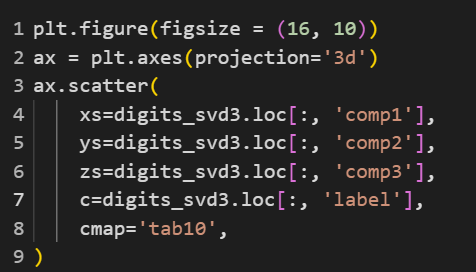

> Pada bagian SVD 3D terdapat kesalahan pada code tersebut, karena sebelumnya adalah ```xs=digits_pca3.loc[]``` yang seharusnya ```xs=digits_svd3.loc[]``` karena code sebelumnya sudah digunakan untuk metode PCA 3D, maka output yang dihasilkan pun sama persis dengan output PCA 3D. Namun, setelah saya rubah maka output yang dihasilkan pun berbeda, maka saya analisis menggunakan output yang sebenarnya.

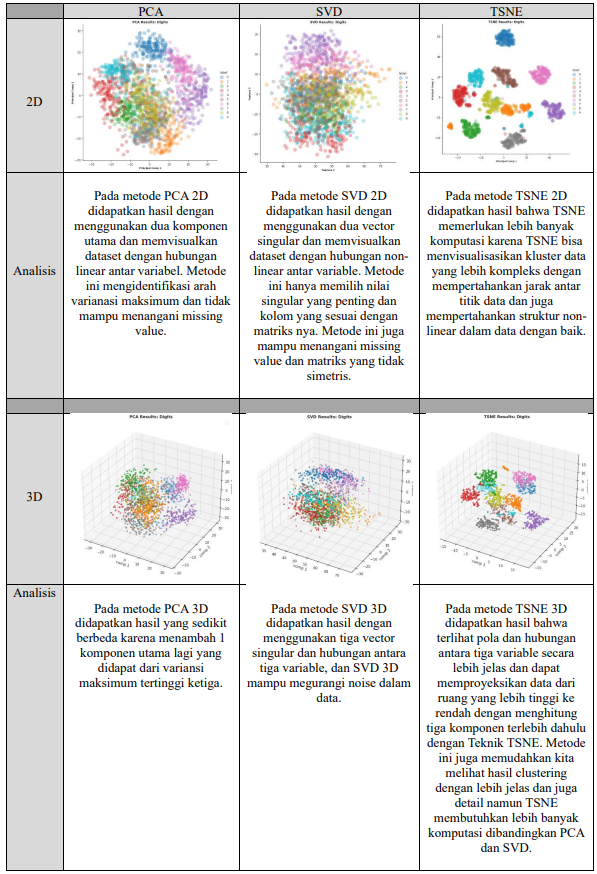

### C. Dari semua dataset yang ada di praktikum kali ini pililhlah minimal satu dataset kemudian lakukan transformasi data encoding dan label encoding!. (poin : 25)

#### encoding

In [ ]:
df7.head() # menampilkan 5 baris pertama dari df7

,ID,No_Pation,Gender,Age,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [ ]:
df7['Gender'].unique() #menampilkan nilai unique dalam kolom gender

array(['F', 'M', 'f'], dtype=object)

In [ ]:
df7['CLASS'].unique() #menampilkan nilai unique dalam kolom class

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [ ]:
# Mengganti attribute yang duplikat dari kolom gender ataupun class
df7['Gender'] = df7['Gender'].str.replace("f", "F")
df7['CLASS'] = df7['CLASS'].str.replace("N ", "N")
df7['CLASS'] = df7['CLASS'].str.replace("Y ", "Y")

In [ ]:
df7['Gender'].unique()#menampilkan nilai unique dalam kolom gender kembali

array(['F', 'M'], dtype=object)

In [ ]:
df7['CLASS'].unique() #menampilkan nilai unique dalam kolom class kembali

array(['N', 'P', 'Y'], dtype=object)

In [ ]:
# buat variabel encodedf7 dengan ketentuan kolom dengan tipedata bukan numerik
encodedf7 = df7.select_dtypes(exclude = [np.number])
encodedf7.head() # menampilkan 5 baris pertama dari encodedf7

,Gender,CLASS
0,F,N
1,M,N
2,F,N
3,F,N
4,M,N


In [ ]:
#menghitung nilai setiap attribut pada kolom gender
encodedf7.Gender.value_counts()

M    570
F    439
Name: Gender, dtype: int64

In [ ]:
#menghitung nilai setiap attribut pada kolom class
encodedf7.CLASS.value_counts()

Y    853
N    103
P     53
Name: CLASS, dtype: int64

In [ ]:
# Mengganti attribute M dengan 0 dan F dengan 1 pada kolom gender
encodedf7.Gender.replace({"M":0, "F": 1}, inplace = True)

In [ ]:
# Mengganti attribute N dengan 0, Y dengan 1, dan P dengan 2 pada kolom class
encodedf7.CLASS.replace({"N":0, "Y": 1, "P" : 2}, inplace = True)

In [ ]:
encodedf7.head() #Menampilkan 5 data teratas pada encodedf7

,Gender,CLASS
0,1,0
1,0,0
2,1,0
3,1,0
4,0,0


In [ ]:
encodedf7.to_csv("150_Encoding.csv") #menyimpan dataset

> Dapat dilihat pada output diatas bahwa, data sudah di encode. Pada kolom gender terdapat 1 untuk Female dan 0 untuk Male, sedangkan pada kolom class terdapat 0 untuk N, 1 untuk Y dan 2 untuk P.

#### label encoding

In [ ]:
df4 = df4.dropna() #enghapus baris yang mengandung missing value

# buat variabel elabeldf4 dengan ketentuan kolom dengan tipedata bukan numerik
labeldf4 = df4.select_dtypes(exclude=[np.number]).columns
labeldf4 # menampilkan nama kolom yang bukan tipe data numerik.

Index(['Grade', 'Employed', 'bucket'], dtype='object')

In [ ]:
df4[labeldf4].head() # menampilkan 5 baris teratas dari df4

,Grade,Employed,bucket
0,1st Class,yes,Poor
1,2nd Class,no,Below_average
2,1st Class,no,Average
3,2nd Class,no,Poor
4,1st Class,no,Average


In [ ]:
# impor LabelEncoder dari libary sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

#membuat sebuah objek label_encoder dari LabelEncoder
#Untuk transformasi label encoding
label_encoder = LabelEncoder()

#Menggunakan perulangan untuk mengganti nilai pada kolom i dengan nilai numerik sesuai dengan label yang ada
#fungsi fit_transform untuk menghitung pemetaan antara nilai unik dalam kolom dan nilai numerik yang sesuai.
for i in labeldf4:
  df4[i] = label_encoder.fit_transform(df4[i])

# Mengelluarkan output Label Encode Data dari dataset df4
print("Label Encoded Data df4: ") # Mengeluarkan output Label Encoded Data df4
df4.head()

Label Encoded Data df4: 


,Student_id,Age,Grade,Employed,marks,bucket
0,1,19,0,1,29,4
1,2,20,1,0,41,2
2,3,18,0,0,57,1
3,4,21,1,0,29,4
4,5,19,0,0,57,1


In [ ]:
df4.to_csv("150_Label Encode.csv") # Menyimpan dataset

> Dapat diihat pada hasil output diatas bahwa kolom yang memiliki tipedata bukan numerik berubah menjadi numerik.

### D. Dari semua dataset yang ada di praktikum kali ini pililhlah minimal satu dataset kemudian lakukan Data Discretization!. (poin : 20)

In [ ]:
df2.head() # Menampilkan 5 baris pertama dari df2

,Student_id,Mark,City
0,1,95,Chennai
1,2,70,Delhi
2,3,98,Mumbai
3,4,75,Pune
4,5,89,Kochi


In [ ]:
# Membuat kolom baru Final Score pada  df2Ini mengkategorikan nilai-nilai dalam kolom 'Mark' menjadi tiga kelompok
# Lalu Memberikan label 'Tidak Lulus', 'Lulus Bersyarat', dan 'Lulus' untuk setiap kelompok tersebut.
df2['Final Score']=pd.cut(df2['Mark'],3,labels=['Tidak Lulus','Lulus Bersyarat',
                                                'Lulus'])

df2.head(10) # Menampilkan 10 baris pertama dari df2 kembali

,Student_id,Mark,City,Final Score
0,1,95,Chennai,Lulus
1,2,70,Delhi,Lulus Bersyarat
2,3,98,Mumbai,Lulus
3,4,75,Pune,Lulus Bersyarat
4,5,89,Kochi,Lulus
5,6,69,Gwalior,Lulus Bersyarat
6,7,52,Bhopal,Tidak Lulus
7,8,54,Chennai,Tidak Lulus
8,9,55,Delhi,Tidak Lulus
9,10,94,Mumbai,Lulus


In [ ]:
df.to_csv('150_Data Discretization.csv') # Menyimpan dataset

> Dapat dilihat dari output diatas, bahwa data sudah di discretization dengan penambahan kolom baru yaitu Final Score dengan 3 attribute didalam nya yaitu Lulus, Lulus Bersyarat dan Tidak Lulus.